# Matching track and rail curve data.

We first read data both track and curve data.

In [17]:
import pandas as pd
import os

# Get the current working directory
current_directory = os.getcwd()

# file path
file_path_tracks = os.path.join(current_directory, 'data', 'Banövergripande_2024-09-28_KO_AA.csv')
file_path_curves = os.path.join(current_directory, 'data', 'Cirkulärkurva 2024-01-09.csv')

# Read the CSV file
# Define a function to replace commas with dots
def replace_comma_with_dot(x):
    return x.replace(',', '.')
df_tracks = pd.read_csv(file_path_tracks, sep=';', low_memory=False, converters={'column_name': replace_comma_with_dot})
df_curves = pd.read_csv(file_path_curves, sep=';', low_memory=False, converters={'column_name': replace_comma_with_dot})

Exploring the dataframe for track characteristics (BIS).

In [18]:
print(df_tracks.columns)
df_tracks.sample(7).T

Index(['Bdl', 'Km', '+m', 'Kmti', '+mti', 'spm', 'UNE', 'spår', 'Pl/Str',
       'objnr', 'Rälmodell', 'Räl vikt(kg/m)', 'Rällängd(m)', 'Skarvtyp',
       'Inläggn.år räl', 'Tillv.år räl', 'Rev.klass räl', 'Tillverkare räl',
       'Stålsort räl', 'Sliper typ', 'Sliperavstånd(mm)', 'Inläggn.år sliper',
       'Tillverkningsår', 'Tillverkare sliper', 'Slipermatta',
       'Befästning typ', 'Klämma', 'Isolator', 'Mellanlägg', 'Ballast typ',
       'Tillverkare', 'Inl/ren.år ballast', 'Tjocklek(cm från suk)',
       'Besiktningsklass', 'Bantyp', 'Stråk', 'Besiktningsklass bana',
       'Spår Huvud/Sido', 'Infrastrukturägare', 'Infrastrukturförvaltare',
       'Underhållsdistrikt', 'UH.kontraktsområde Bas', 'UH.entreprenör Bas',
       'Status järnvägsnät', 'Funktionella system', 'Anläggningsregion',
       'Rälmodell_Räl vikt(kg/m)_Sliper typ_Befästning typ'],
      dtype='object')


,2658,5219,4915,757,2134,4459,3783
Bdl,401,612,527,153,323,494,433
Km,0,422,224,55,8,98,30
+m,143,838,398,891,872,410,814
Kmti,0.0,423.0,224.0,56.0,16.0,98.0,31.0
+mti,398.0,40.0,454.0,91.0,160.0,590.0,771.0
spm,255,201,56,199,7263,180,957
UNE,E,U,N,E,E,E,N
spår,ö,2,1,2,NaN,2,2
Pl/Str,Ke,Ndv,Ör,Tsg,Hno-Orn,Skrp,Rs
objnr,30621,10751,13641,2608,10288,6792,1098


Exploring the dataframe for rail curves data.

In [19]:
print(df_curves.columns)
df_curves.sample(7).T

Index(['wkt_geom', 'id', 'ELEMENT_ID', 'VALID_FROM', 'VALID_TO',
       'START_MEASURE', 'END_MEASURE', 'EXTENT_LENGTH', 'Bisobjektnr',
       'Bisobjekttypnr', 'Giltig_fran_datum', 'Inkopplingsdatum', 'Kmtal',
       'Kmtalti', 'Koordinater_centrum', 'Koordinater_slut',
       'Koordinater_start', 'Langd_m', 'Radie_m', 'Ursprung_koordinater'],
      dtype='object')


,13709,6058,23606,25309,1792,1437,4466
wkt_geom,LineStringZ (511398.05629113834584132 6343522....,LineStringZ (535861.78493101859930903 6475786....,LineStringZ (374487.26193225284805521 6195085....,LineStringZ (688400.68637689191382378 7025277....,LineStringZ (561919.85628852189984173 6842749....,LineStringZ (593033.38000000000465661 6776863....,LineStringZ (353980.55185107345459983 7024433....
id,13710,6059,23607,25310,1793,1438,4467
ELEMENT_ID,417388ec-82c2-4c51-85e7-08dfe65331cd,40a4fc47-f93a-4580-afac-d9b596e3236e,373de474-30b7-411a-9ccf-9828ec9ebc09,d83f8497-652a-4e70-85f7-89bbdc2b059a,12bcc23d-6f7f-457e-b745-1fe0d4b0f22b,e0503ce4-b1ff-43ae-ac9d-90ebd056e7e6,c50a6df7-85b3-40fa-af5d-3ecbc8877746
VALID_FROM,20221126,20230209,20230206,20230206,20230206,20230206,20230206
VALID_TO,99991231,99991231,99991231,99991231,99991231,99991231,99991231
START_MEASURE,"0,41716809","0,092282533","0,525098294","0,152408942","0,335148643",0,"0,927545827"
END_MEASURE,"0,418495637","0,149812732","0,707633471","0,264658075","0,439239405","0,424685099","0,964528761"
EXTENT_LENGTH,"27,251","18,51","33,103","88,347","13,003","64,185","21,001"
Bisobjektnr,13663,27775,43289,34878,32515,34180,46486
Bisobjekttypnr,4010,4010,4010,4010,4010,4010,4010


## Data filtering

We will filter raw data by keeping only relevant columns.

In [20]:
# Keeping relevant columns for df_tracks
relevant_columns_tracks = [
    'Bdl', 'Km', '+m', 'Kmti', '+mti', 'spm', 'UNE', 'spår', 'Pl/Str', 
    'Rälmodell', 'Räl vikt(kg/m)', 'Sliper typ', 'Befästning typ'
]
df_tracks_filtered = df_tracks[relevant_columns_tracks].copy()
df_tracks_filtered['Km'] = df_tracks_filtered['Km'].astype(float)
df_tracks_filtered['+m'] = df_tracks_filtered['+m'].astype(float)
df_tracks_filtered['Kmti'] = df_tracks_filtered['Kmti'].astype(float)
df_tracks_filtered['+mti'] = df_tracks_filtered['+mti'].astype(float)

# remove (2%)rows missing values of kmtil or +mti
df_tracks_filtered.dropna(subset=['Kmti', '+mti'], inplace=True)

In [21]:
# Displaying the filtered data
df_tracks_filtered.head()

,Bdl,Km,+m,Kmti,+mti,spm,UNE,spår,Pl/Str,Rälmodell,Räl vikt(kg/m),Sliper typ,Befästning typ
0,1,38.0,785.0,40.0,478.0,1657,E,NaN,Bfo-Tjs,BJ,32,T,R-spik
1,1,40.0,478.0,40.0,953.0,475,E,NaN,Tjs,BJ,32,T,R-spik
2,1,40.0,953.0,43.0,276.0,2310,E,NaN,Tjs-Bef,BJ,32,T,R-spik
3,1,43.0,276.0,43.0,515.0,239,E,z2,Bef,BJ,32,T,R-spik
4,111,1417.0,874.0,1422.0,705.0,4831,E,NaN,Pea-Kv,E1,60,B2.5,P-Ec


Since df_curve includes columns Kmtal and Kmtalti with XX+YY format, we split them into two columns one for meter (YY) and one for km (XX).

In [22]:
# Keeping relevant columns for df_curves
relevant_columns_curves = ['Kmtal', 'Kmtalti', 'Langd_m', 'Radie_m']
df_curves_filtered = df_curves[relevant_columns_curves].copy()
df_curves_filtered['Langd_m'] = df_curves_filtered['Langd_m'].str.replace(',', '.').astype(float)# Replace commas with periods and convert to float
df_curves_filtered['Radie_m'] = df_curves_filtered['Radie_m'].str.replace(',', '.').astype(float)# Replace commas with periods and convert to float

# remove duplicates in df_curves
df_curves_filtered.drop_duplicates(inplace=True)

# Function to split 'XX+YY' format
def split_km_meter(col):
    split_data = col.str.split('+', expand=True)
    split_data.columns = ['Km', 'Meter']  # Naming the new columns
    split_data['Km'] = pd.to_numeric(split_data['Km'], errors='coerce').astype(float)  # Converting to float
    split_data['Meter'] = pd.to_numeric(split_data['Meter'], errors='coerce').astype(float)  # Converting to float
    return split_data

# Generate the new columns for Kmtal and Kmtalti separately
kmtal_split = split_km_meter(df_curves_filtered['Kmtal'])
kmtalti_split = split_km_meter(df_curves_filtered['Kmtalti'])

# Assign the new columns back to the DataFrame explicitly
df_curves_filtered.loc[:,'Kmtal_Km'] = kmtal_split['Km']
df_curves_filtered.loc[:,'Kmtal_Meter'] = kmtal_split['Meter']
df_curves_filtered.loc[:,'Kmtalti_Km'] = kmtalti_split['Km']
df_curves_filtered.loc[:,'Kmtalti_Meter'] = kmtalti_split['Meter']

In [23]:
df_curves_filtered.sample(7)

,Kmtal,Kmtalti,Langd_m,Radie_m,Kmtal_Km,Kmtal_Meter,Kmtalti_Km,Kmtalti_Meter
6378,34+992,35+64,71.746,-737.0,34.0,992.0,35.0,64.0
15644,36+35,36+70,35.000,802.0,36.0,35.0,36.0,70.0
11686,371+601,371+652,51.033,-6600.0,371.0,601.0,371.0,652.0
21072,229+291,229+325,33.937,-250.0,229.0,291.0,229.0,325.0
3995,300+380,300+465,85.000,385.0,300.0,380.0,300.0,465.0
525,430+792,431+183,389.948,439.0,430.0,792.0,431.0,183.0
4057,944+263,944+536,273.579,-588.0,944.0,263.0,944.0,536.0


Summary info of the filtered curves and tracks.

In [24]:
df_curves_filtered.info()
df_tracks_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25681 entries, 0 to 27659
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kmtal          25681 non-null  object 
 1   Kmtalti        25681 non-null  object 
 2   Langd_m        25681 non-null  float64
 3   Radie_m        25681 non-null  float64
 4   Kmtal_Km       25681 non-null  float64
 5   Kmtal_Meter    25681 non-null  float64
 6   Kmtalti_Km     25681 non-null  float64
 7   Kmtalti_Meter  25681 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 7656 entries, 0 to 7778
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bdl             7656 non-null   int64  
 1   Km              7656 non-null   float64
 2   +m              7656 non-null   float64
 3   Kmti            7656 non-null   float64
 4   +mti            7656 non-nul

## Matching curves to tracks

We want to match curves to the track or tracks they are part of. We will mainly use the locations as our criteria for matching, i.e., Kmtal_Km	Kmtal_Meter	Kmtalti_Km	Kmtalti_Meter for curves, and Km	+m	Kmti	+mti for tracks.

In [25]:
# Convert Km and Meter to total meters for curves
df_curves_filtered.loc[:, 'Curve_Start_Meters'] = df_curves_filtered.loc[:, 'Kmtal_Km'] * 1000 + df_curves_filtered.loc[:, 'Kmtal_Meter']
df_curves_filtered.loc[:, 'Curve_End_Meters'] = df_curves_filtered.loc[:, 'Kmtalti_Km'] * 1000 + df_curves_filtered.loc[:, 'Kmtalti_Meter']

# Convert Km and Meter to total meters for tracks
df_tracks_filtered.loc[:, 'Track_Start_Meters'] = df_tracks_filtered.loc[:, 'Km'] * 1000 + df_tracks_filtered.loc[:, '+m']
df_tracks_filtered.loc[:, 'Track_End_Meters'] = df_tracks_filtered.loc[:, 'Kmti'] * 1000 + df_tracks_filtered.loc[:, '+mti']

In [26]:
df_tracks_filtered.head(), df_curves_filtered.head()

(   Bdl      Km     +m    Kmti   +mti   spm UNE spår   Pl/Str Rälmodell  \
 0    1    38.0  785.0    40.0  478.0  1657   E  NaN  Bfo-Tjs        BJ   
 1    1    40.0  478.0    40.0  953.0   475   E  NaN      Tjs        BJ   
 2    1    40.0  953.0    43.0  276.0  2310   E  NaN  Tjs-Bef        BJ   
 3    1    43.0  276.0    43.0  515.0   239   E   z2      Bef        BJ   
 4  111  1417.0  874.0  1422.0  705.0  4831   E  NaN   Pea-Kv        E1   
 
    Räl vikt(kg/m) Sliper typ Befästning typ  Track_Start_Meters  \
 0              32          T         R-spik             38785.0   
 1              32          T         R-spik             40478.0   
 2              32          T         R-spik             40953.0   
 3              32          T         R-spik             43276.0   
 4              60       B2.5           P-Ec           1417874.0   
 
    Track_End_Meters  
 0           40478.0  
 1           40953.0  
 2           43276.0  
 3           43515.0  
 4         1422705.0  ,

Since there are multiple cases for matching, we start with the simplest case, i.e., each curve can is within one track segment. Other cases include curves overlapping two track segments, etc. 

In [27]:
# Method 1: Using merge_asof with custom conditions
def match_curves_to_tracks_efficient(df_curves, df_tracks):
    # First, ensure both dataframes are sorted by start meters
    curves_sorted = df_curves.sort_values('Curve_Start_Meters').copy()
    tracks_sorted = df_tracks.sort_values('Track_Start_Meters').copy()
    
    # Use merge_asof to find the closest track that starts before each curve
    merged = pd.merge_asof(
        curves_sorted,
        tracks_sorted,
        left_on='Curve_Start_Meters',
        right_on='Track_Start_Meters',
        direction='backward'
    )
    
    # Filter for valid matches where the curve ends before the track ends
    valid_matches = merged[merged['Curve_End_Meters'] <= merged['Track_End_Meters']]
    

    # Rename the relevant columns
    result = valid_matches.rename(columns={
        # Curves
        'Kmtal_Km': 'Curve_Kmtal_km',
        'Kmtal_Meter': 'Curve_Kmtal_meter',
        'Kmtalti_Km': 'Curve_Kmtaltil_km',
        'Kmtalti_Meter': 'Curve_Kmtaltil_meter',
        'Kmtal': 'Curve_Kmtal',
        'Kmtalti': 'Curve_Kmtalti',
        'Langd_m': 'Curve_Langd_m',
        'Radie_m': 'Curve_Radie_m',
        # Tracks
        'Bdl': 'Track_Bdl',
        'Km': 'Track_Km',
        '+m': 'Track_+m',
        'Kmti': 'Track_Kmti',
        '+mti': 'Track_+mti',
        'spm': 'Track_spm',
        'UNE': 'Track_UNE',
        'spår': 'Track_spår',
        'Pl/Str': 'Track_Pl/Str',
        'Rälmodell': 'Track_Rälmodell',
        'Räl vikt(kg/m)': 'Track_Räl_vikt(kg/m)',
        'Sliper typ': 'Track_Sliper_typ',
        'Befästning typ': 'Track_Befästning_typ'
    })
    
    return result

In [28]:
matched_df = match_curves_to_tracks_efficient(df_curves_filtered, df_tracks_filtered)

We save the resulting matching as a CSV file.

In [29]:
matched_df.to_csv('matched_curves_within_tracks.csv')

Just to make sure we have a high enough matching rate, we will check the statistics of the share of curves that were successfully matched to a track.

In [30]:
def calculate_matching_statistics(df_curves_original, matched_df):
    """
    Calculate matching statistics for curves both by count and length
    
    Parameters:
    df_curves_original: Original curves DataFrame
    matched_df: DataFrame containing the matched curves
    
    Returns:
    dict containing various matching statistics
    """
    # Count-based statistics
    total_curves = len(df_curves_original)
    matched_curves = len(matched_df['Curve_Kmtal'].unique())
    unmatched_curves = total_curves - matched_curves
    percentage_matched_count = (matched_curves / total_curves * 100) if total_curves > 0 else 0
    
    # Length-based statistics using Langd_m column
    total_curve_length = df_curves_original['Langd_m'].sum()
    
    # Get the original Langd_m values for matched curves
    matched_curve_length = df_curves_original[
        df_curves_original['Kmtal'].isin(matched_df['Curve_Kmtal'])
    ]['Langd_m'].sum()
    
    percentage_matched_length = (matched_curve_length / total_curve_length * 100) if total_curve_length > 0 else 0
    
    # Create detailed statistics dictionary
    stats = {
        'count_stats': {
            'total_curves': total_curves,
            'matched_curves': matched_curves,
            'unmatched_curves': unmatched_curves,
            'percentage_matched': percentage_matched_count
        },
        'length_stats': {
            'total_length_meters': total_curve_length,
            'matched_length_meters': matched_curve_length,
            'unmatched_length_meters': total_curve_length - matched_curve_length,
            'percentage_matched': percentage_matched_length
        }
    }
    
    return stats

def print_matching_statistics(stats):
    """
    Print the matching statistics in a readable format
    """
    print("=== Curve Matching Statistics ===")
    print("\nCount-based Statistics:")
    print(f"Total curves: {stats['count_stats']['total_curves']:,}")
    print(f"Matched curves: {stats['count_stats']['matched_curves']:,}")
    print(f"Unmatched curves: {stats['count_stats']['unmatched_curves']:,}")
    print(f"Percentage matched (count): {stats['count_stats']['percentage_matched']:.2f}%")
    
    print("\nLength-based Statistics:")
    print(f"Total curve length: {stats['length_stats']['total_length_meters']:,.2f} meters")
    print(f"Matched curve length: {stats['length_stats']['matched_length_meters']:,.2f} meters")
    print(f"Unmatched curve length: {stats['length_stats']['unmatched_length_meters']:,.2f} meters")
    print(f"Percentage matched (length): {stats['length_stats']['percentage_matched']:.2f}%")

# Usage example:
stats = calculate_matching_statistics(df_curves_filtered, matched_df)
print_matching_statistics(stats)

=== Curve Matching Statistics ===

Count-based Statistics:
Total curves: 25,681
Matched curves: 18,455
Unmatched curves: 7,226
Percentage matched (count): 71.86%

Length-based Statistics:
Total curve length: 3,988,954.44 meters
Matched curve length: 2,462,428.08 meters
Unmatched curve length: 1,526,526.35 meters
Percentage matched (length): 61.73%


## Identifying representative standard track-curve elements

Once the track and curve datasets are merged, we can now identify some representative standard element or track-curve categories.
A track-curve category is defined by the following configuration parameters:
- Curve radius class, i.e., where R is the curve radius or Radie_m

        0<R<300	1
        301<R<450	2
        451<R<600	3
        601<R<800	4
        801<R<1500	5
        1501<R<9 999	6
        10 000<R	7

- Track configurations

    o	Rälmodell      
    o	Räl vikt(kg/m)      
    o	Sliper typ      
    o	Befästning typ

In [32]:
# Define the function to classify curve radius into categories
def classify_radius(radius):
    if radius < 300:
        return 1
    elif 301 <= radius < 450:
        return 2
    elif 451 <= radius < 600:
        return 3
    elif 601 <= radius < 800:
        return 4
    elif 801 <= radius < 1500:
        return 5
    elif 1501 <= radius < 9999:
        return 6
    else:
        return 7

# Assuming matched_df is the merged dataframe of tracks and curves
# Apply the radius classification to create a new column
matched_df['Radius_Category'] = matched_df['Curve_Radie_m'].apply(classify_radius)

The identification be based on
-	Traffic data (to do!)
-	Length of the element/track-curve (done here!)

First the categories order in total accumulated length

In [35]:
# Group by track configurations and the new radius category
grouped = matched_df.groupby(
    ['Radius_Category', 'Track_Rälmodell', 'Track_Räl_vikt(kg/m)', 'Track_Sliper_typ', 'Track_Befästning_typ']
).agg({
    'Curve_Langd_m': 'sum'  # Sum the lengths of tracks in each group
}).reset_index()

# Sort by total length (Langd_m) in descending order
grouped_sorted = grouped.sort_values(by='Curve_Langd_m', ascending=False)

# Display the result
print(grouped_sorted)

     Radius_Category Track_Rälmodell  Track_Räl_vikt(kg/m) Track_Sliper_typ  \
160                1             UIC                  60.0             B2.5   
617                6             UIC                  60.0             B2.5   
150                1             UIC                  60.0                B   
521                5             UIC                  60.0             B2.5   
79                 1              E1                  60.0             B2.5   
..               ...             ...                   ...              ...   
663                7              E1                  60.0             B2.5   
624                7               ?                   0.0                ?   
0                  1               ?                   0.0                ?   
143                1              SJ                  50.0                T   
657                7              E1                  60.0                ?   

    Track_Befästning_typ  Curve_Langd_m  
160      

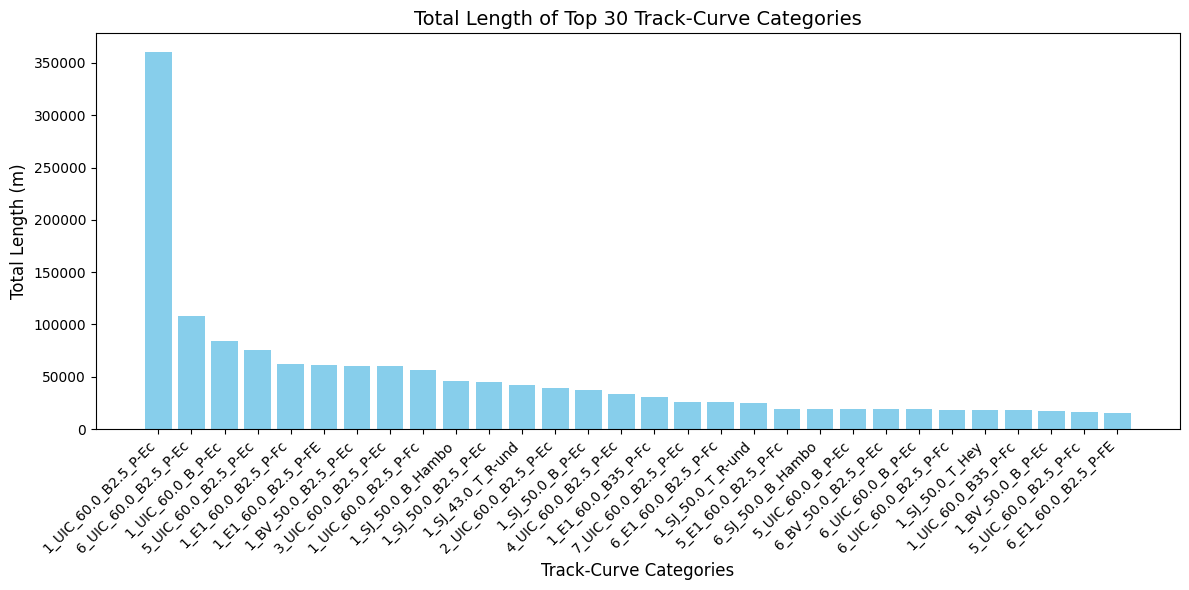

In [40]:
import matplotlib.pyplot as plt

# Select the top 30 categories based on total length
top_30 = grouped_sorted.head(30)

# Create a new column for Track-Curve Category based on the grouping columns
top_30.loc[:,'Track_Curve_Category'] = (
    top_30['Radius_Category'].astype(str) + '_' +
    top_30['Track_Rälmodell'] + '_' +
    top_30['Track_Räl_vikt(kg/m)'].astype(str) + '_' +
    top_30['Track_Sliper_typ'] + '_' +
    top_30['Track_Befästning_typ']
)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(top_30['Track_Curve_Category'], top_30['Curve_Langd_m'], color='skyblue')

# Adding titles and labels
plt.title('Total Length of Top 30 Track-Curve Categories', fontsize=14)
plt.xlabel('Track-Curve Categories', fontsize=12)
plt.ylabel('Total Length (m)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid label clipping
plt.tight_layout()

# Show plot
plt.show()

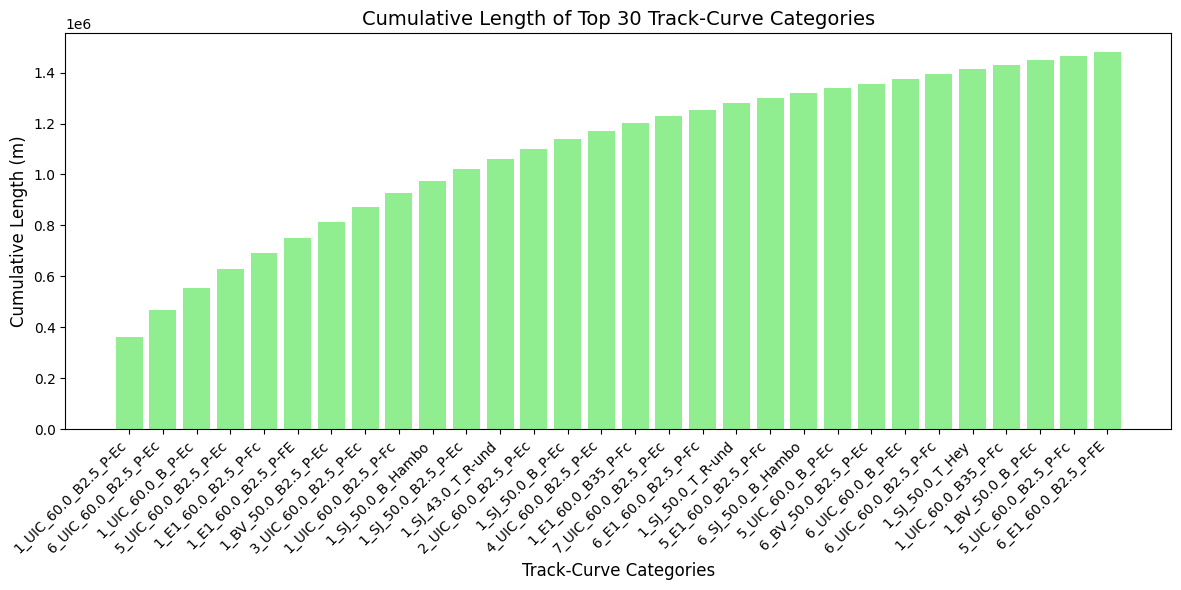

In [42]:
# Calculate the cumulative length
top_30.loc[:,'Cumulative_Length'] = top_30.loc[:,'Curve_Langd_m'].cumsum()

# Plot the cumulative length
plt.figure(figsize=(12, 6))
plt.bar(top_30['Track_Curve_Category'], top_30['Cumulative_Length'], color='lightgreen')

# Adding titles and labels
plt.title('Cumulative Length of Top 30 Track-Curve Categories', fontsize=14)
plt.xlabel('Track-Curve Categories', fontsize=12)
plt.ylabel('Cumulative Length (m)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid label clipping
plt.tight_layout()

# Show plot
plt.show()